# Cross-validation

One-liner definition: a step in the process of building a machine learning model in which ensures the model fits the data accurately and ensures that the model doesn't overfit

What is overfitting?

In [1]:
import pandas as pd
from sklearn import datasets

In [5]:
X, y = datasets.fetch_openml('wine-quality-red',
                version=1,
                return_X_y=True)
X.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [6]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: class, dtype: category
Categories (6, object): ['3', '4', '5', '6', '7', '8']

In [38]:
df = X.copy()

In [39]:
df['quality'] = y.copy()

In [40]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [32]:
# map quality values to 0-5
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

In [53]:
df['quality'] = df.quality.astype(int).map(quality_mapping)

In [54]:
# split the data 1000 train and 599 test

# shuffle dataframe
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.head(1000)

df_test = df.tail(599)

In [56]:
# train decision tree classifier on training set

from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth=3)

# choose training features
features = [
    'fixed_acidity',
    'volatile_acidity',
    'citric_acid',
    'residual_sugar',
    'chlorides',
    'free_sulfur_dioxide',
    'total_sulfur_dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol',
]

# train on features and fit to quality (labels)
clf.fit(df_train[features], df_train['quality'])
#df_train.quality

DecisionTreeClassifier(max_depth=3)

In [57]:
# test accuracy
train_predictions = clf.predict(df_train[features])

test_predictions = clf.predict(df_test[features])

train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)

test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

In [58]:
train_accuracy, test_accuracy

(0.609, 0.5442404006677797)

In [59]:
import matplotlib
import matplotlib.pyplot as plt

# global size of label text
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

%matplotlib inline

# start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

for depth in range(1, 25):
    
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    clf.fit(df_train[features], df_train['quality'])
    
    train_predictions = clf.predict(df_train[features])

    test_predictions = clf.predict(df_test[features])

    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions
    )

    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    )
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

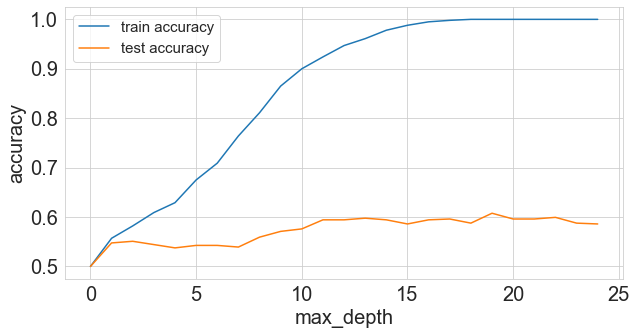

In [62]:
# create two plots
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel('max_depth', size=20)
plt.ylabel('accuracy', size=20)
plt.show()

The model peforms great on the training data but continues to perform poorly on the test set

This is overfitting

For large datasets it's ideal to hold out a single subset of data. This is often called the validation or dev dataset

But for smaller datasets it can be beneficial to alternate the training datasets and the validation set. This is the idea of cross validation

K-fold cross validation takes the knumber of dataset splits are created in trained on. 

Stratified K-fold keeps the dataset within the ratio of labels consistent

Hold-out, again is ideal for large datasets, but also for time-series data

here's the many common tipes

- k-fold cross validation
- stratified k-fold cross validation
- hould out based validation
- leave-one out cross validation
- group k-fold cross validation
